<a href="https://colab.research.google.com/github/konverner/shiftlab_ocr/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/conwerner/shiftlab_ocr.git
!pip install -r /content/shiftlab_ocr/requirements.txt

fatal: destination path 'shiftlab_ocr' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-7.1.2-cp310-cp310-linux_x86_64.whl size=1301337 sha256=ff97e19a59063d179297ff9c4e87f26014a1e1f6aac0129414e1450ca2d4d453
  Stored in directory: /root/.cache/pip/wheels/b1/33/ce/d1c30cb9fc3ba1b8e60a01d4f49e35a1e65b6911bd3722e3e9
Successfully built Pillow
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0

## Input Image

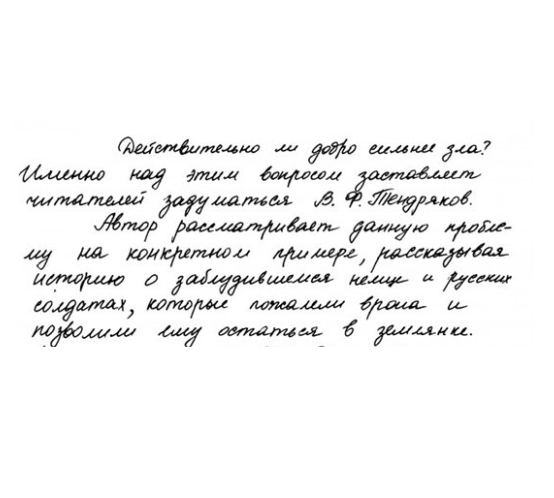

In [1]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve(
  'https://raw.githubusercontent.com/konverner/shiftlab_ocr/main/demo_image.png',
   'test.png')

img = Image.open('test.png')
img

In [2]:
from shiftlab_ocr.doc2text import Reader

reader = Reader()
result = reader.doc2text("/content/test.png")

recognizer weights has loaded from /content/shiftlab_ocr/doc2text/weights/ocr_transformer_4h2l_simple_conv_64x256.pt


## Result: text and crops

In [3]:
print(result[0])

Действительно ли добро сильнее зла? Именно над этим вопросом аставля заставляет читателей задуматься В. Тендряков. Автор рассматривает данную пробле- му на конкретном примере, рассказывая историю 0 заблудившемся немце русских солдатах, которые пожалели врала и позволи ему остаться землянке. 


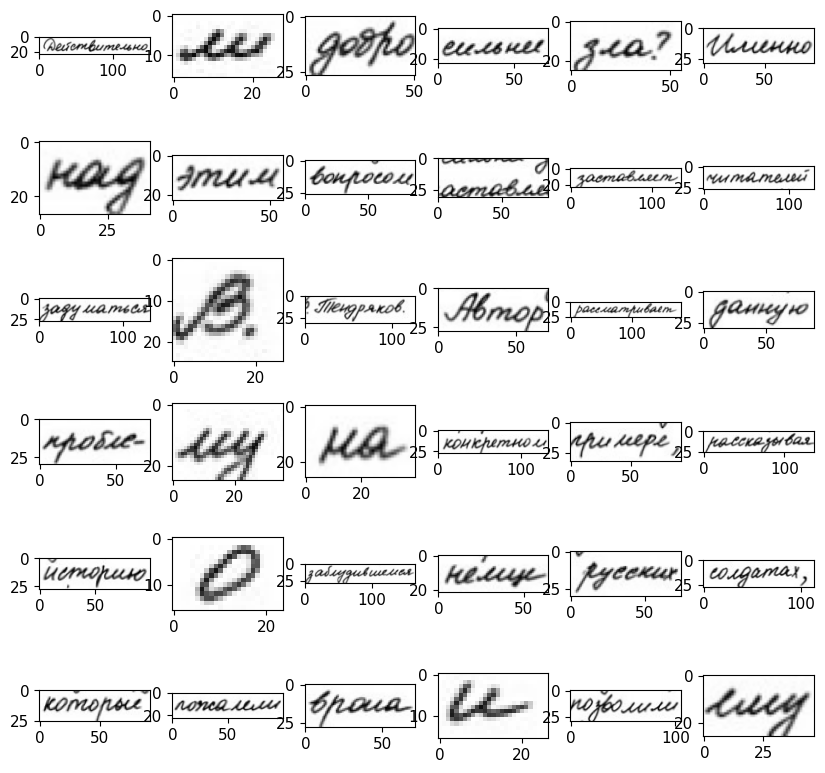

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

images = result[1]
N = 48  # how many crops to show
n = int(N**(0.5))
k = 0
f, axarr = plt.subplots(n,n,figsize=(10,10))
for i in range(n):
    for j in range(n):
        axarr[i,j].imshow(images[k].img)
        k += 1
f.show()